# Name:- Parshwa Shah
# Experiment No.:- 1b
# Roll No.- 34
# UID:- 2019230071
# Batch:- B

<h2>Aim:- To implement and use Logistic Regression using Python Platform </h2>

<center> <h1> Logistic Regression </h1><center>

<h3> Importing the libraries </h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h3> Importing the dataset </h3>

In [ ]:
dataset = pd.read_csv('horse.csv')

In [ ]:
dataset

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


<h3> Drop unnecessary columns </h3>

In [ ]:
dataset = dataset.drop(['hospital_number'], axis=1)

In [ ]:
dataset

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


<h3> Check for Nan values in dataset </h3>

In [ ]:
dataset.isna().sum()

surgery                    0
age                        0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

<h3> Check for categorical and numeric columns in dataset </h3>

In [ ]:
dataset.dtypes.value_counts()

object     17
float64     7
int64       3
dtype: int64

<h3> Divide dataset into categorical and numerical dataframes </h3>

In [ ]:
cat_columns=[]
num_columns=[]
for col in dataset.columns.values:
    if dataset[col].dtype=='object':
        cat_columns.append(col)
    else:
        num_columns.append(col)
print(len(cat_columns)," Categorical Columns are \n",cat_columns,'\n')
print(len(num_columns),"Numeric columns are \n",num_columns)

cat_data=dataset[cat_columns]
num_data=dataset[num_columns]

17  Categorical Columns are 
 ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome', 'surgical_lesion', 'cp_data'] 

10 Numeric columns are 
 ['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']


<h3> Remove numerical columns whose Nan values > 40% </h3>

In [ ]:
print("Data Size Before Numerical NAN Column(>40%) Removal :",num_data.shape)
for col in num_data.columns.values:
    if (pd.isna(num_data[col]).sum())>0:
        if pd.isna(num_data[col]).sum() > (40/100*len(num_data)):
            print(col,"removed")
            num_data=num_data.drop([col], axis=1)
        else:
            num_data[col]=num_data[col].fillna(num_data[col].median())
print("Data Size After Numerical NAN Column(>40%) Removal :",num_data.shape)


Data Size Before Numerical NAN Column(>40%) Removal : (299, 10)
nasogastric_reflux_ph removed
abdomo_protein removed
Data Size After Numerical NAN Column(>40%) Removal : (299, 8)


<h3> Remove categorical columns whose Nan values > 40% </h3>

In [ ]:
print("Data Size Before Categorical NAN Column(>40%) Removal :",cat_data.shape)
for col in cat_data.columns.values:
    if (pd.isna(cat_data[col]).sum())>0:
        if pd.isna(cat_data[col]).sum() > (40/100*len(cat_data)):
            print(col,"removed")
            cat_data=cat_data.drop([col], axis=1)
        else:
            cat_data[col]=cat_data[col].fillna(cat_data[col].mode()[0])
print("Data Size After Categorical NAN Column(>40%) Removal :",cat_data.shape)

Data Size Before Categorical NAN Column(>40%) Removal : (299, 17)
abdomo_appearance removed
Data Size After Categorical NAN Column(>40%) Removal : (299, 16)


In [ ]:
num_data

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3
0,38.5,66.0,28.0,45.0,8.4,11300,0,0
1,39.2,88.0,20.0,50.0,85.0,2208,0,0
2,38.3,40.0,24.0,33.0,6.7,0,0,0
3,39.1,164.0,84.0,48.0,7.2,2208,0,0
4,37.3,104.0,35.0,74.0,7.4,4300,0,0
...,...,...,...,...,...,...,...,...
294,38.2,120.0,70.0,55.0,65.0,3205,0,0
295,37.2,72.0,24.0,44.0,7.5,2208,0,0
296,37.5,72.0,30.0,60.0,6.8,3205,0,0
297,36.5,100.0,24.0,50.0,6.0,2208,0,0


In [ ]:
cat_data

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,outcome,surgical_lesion,cp_data
0,no,adult,cool,reduced,normal_pink,more_3_sec,extreme_pain,absent,severe,slight,none,decreased,distend_large,died,no,no
1,yes,adult,cool,normal,pale_cyanotic,less_3_sec,mild_pain,absent,slight,slight,none,absent,other,euthanized,no,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,normal,normal,lived,no,yes
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,distend_large,died,yes,yes
4,no,adult,cool,normal,dark_cyanotic,more_3_sec,mild_pain,hypomotile,none,slight,none,absent,distend_large,died,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,cold,normal,pale_cyanotic,more_3_sec,depressed,absent,none,slight,none,absent,distend_large,euthanized,no,no
295,no,adult,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,absent,distend_small,euthanized,yes,yes
296,yes,adult,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,decreased,distend_large,died,yes,no
297,yes,adult,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,absent,distend_small,lived,yes,yes


<h3> Basic Exploratory data Analysis </h3>

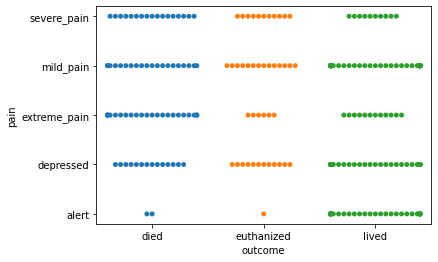

In [ ]:
import seaborn as sns
sns.swarmplot(y = 'pain',
            x = 'outcome',
            data = cat_data)

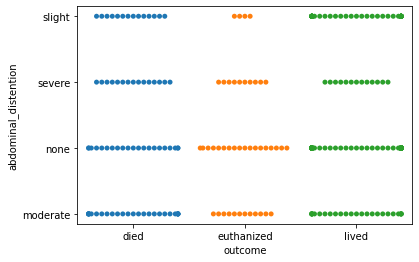

In [ ]:
import seaborn as sns
sns.swarmplot(y = 'abdominal_distention',
            x = 'outcome',
            data = cat_data)

<h3> Label Encode the categorical data </h3>

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for col in cat_data.columns:
    cat_data[col]= label_encoder.fit_transform(cat_data[col])

In [ ]:
cat_data

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,outcome,surgical_lesion,cp_data
0,0,0,1,3,3,2,2,0,2,2,2,1,0,0,0,0
1,1,0,1,2,4,1,3,0,3,2,2,0,4,1,0,0
2,0,0,2,2,5,1,3,2,1,2,2,3,3,2,0,1
3,1,1,0,2,2,2,1,0,2,0,0,1,0,0,1,1
4,0,0,1,2,2,2,3,2,1,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,0,2,4,2,1,0,1,2,2,0,0,1,0,0
295,0,0,1,1,4,2,4,2,0,1,2,0,1,1,1,1
296,1,0,0,3,4,1,4,0,0,2,2,1,0,0,1,0
297,1,0,1,3,5,1,3,2,0,1,2,0,1,2,1,1


<h3> Merge the numerical and categorical dataframes </h3>

In [ ]:
finaldata=pd.concat([num_data,cat_data],axis=1)
finaldata

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,outcome,surgical_lesion,cp_data
0,38.5,66.0,28.0,45.0,8.4,11300,0,0,0,0,1,3,3,2,2,0,2,2,2,1,0,0,0,0
1,39.2,88.0,20.0,50.0,85.0,2208,0,0,1,0,1,2,4,1,3,0,3,2,2,0,4,1,0,0
2,38.3,40.0,24.0,33.0,6.7,0,0,0,0,0,2,2,5,1,3,2,1,2,2,3,3,2,0,1
3,39.1,164.0,84.0,48.0,7.2,2208,0,0,1,1,0,2,2,2,1,0,2,0,0,1,0,0,1,1
4,37.3,104.0,35.0,74.0,7.4,4300,0,0,0,0,1,2,2,2,3,2,1,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,38.2,120.0,70.0,55.0,65.0,3205,0,0,1,0,0,2,4,2,1,0,1,2,2,0,0,1,0,0
295,37.2,72.0,24.0,44.0,7.5,2208,0,0,0,0,1,1,4,2,4,2,0,1,2,0,1,1,1,1
296,37.5,72.0,30.0,60.0,6.8,3205,0,0,1,0,0,3,4,1,4,0,0,2,2,1,0,0,1,0
297,36.5,100.0,24.0,50.0,6.0,2208,0,0,1,0,1,3,5,1,3,2,0,1,2,0,1,2,1,1


<h3> Plot the correlation graph</h3>

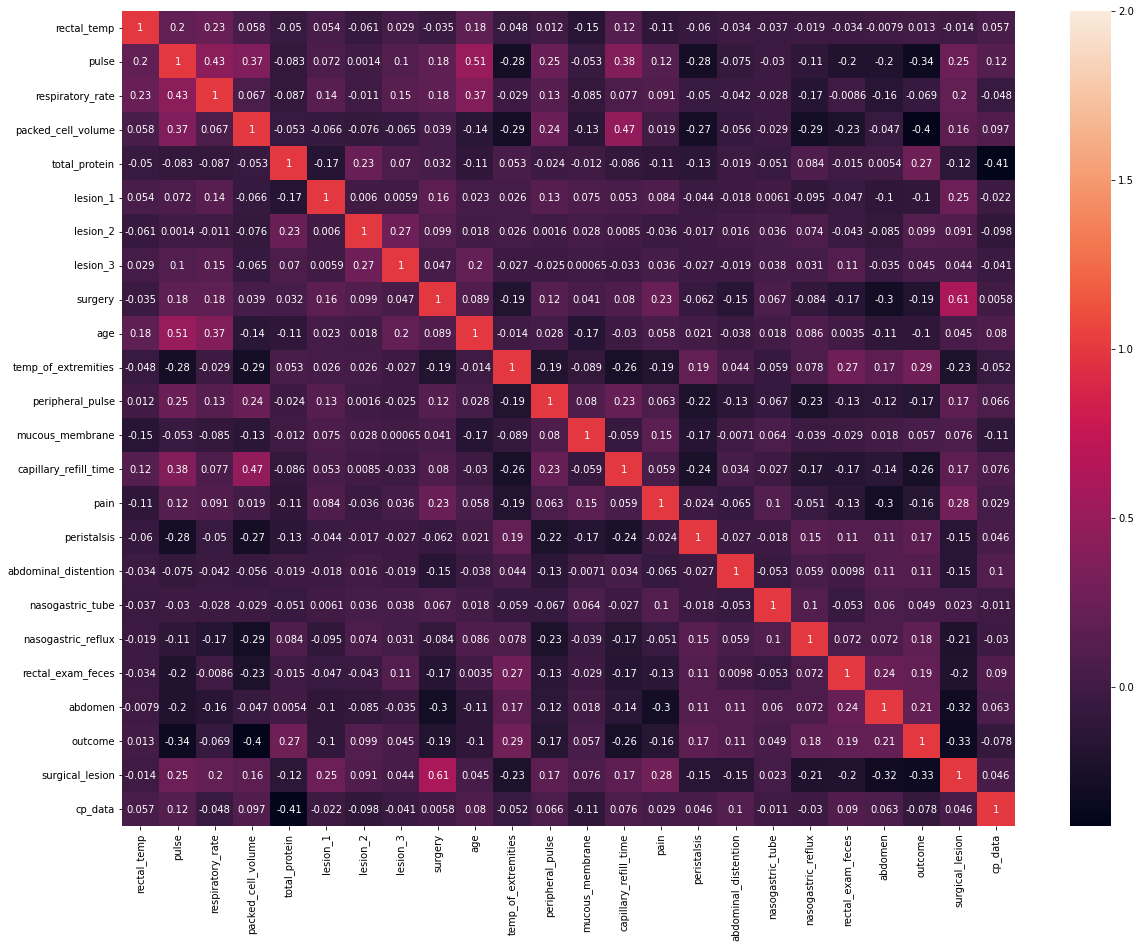

In [ ]:
import seaborn as sns
train_corr=finaldata.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(train_corr, vmax=2.0,annot=True)


<h3>Inference</h3> <br/>

This shows that features like pulse, surgical lesion,packed cell volume have strong correlation with our outcome variable which implies that these features play crucial role in classifying the target. <br/>

1) As surgery increases, chances of death increases <br/>
2) As age increases, chances of death increases <br/>
3) As pulse increases, chances of life decreases <br/>
4) As packed_cell_volume increases, chances of death increases <br/>
5) As total_protein increases, chances of life increases <br/>
6) As temp_of_extremities increases, chances of life increases <br/>
7) As pain increases, chances of death increases
8) As surgical_lesion increases, chances of life decreases <br/>

<h3> Divide dataset into X and y </h3>

In [ ]:
y = finaldata['outcome'].to_frame()
y

,outcome
0,0
1,1
2,2
3,0
4,0
...,...
294,1
295,1
296,0
297,2


In [ ]:
X = finaldata.drop(['outcome'], axis = 1)

In [ ]:
X

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,surgical_lesion,cp_data
0,38.5,66.0,28.0,45.0,8.4,11300,0,0,0,0,1,3,3,2,2,0,2,2,2,1,0,0,0
1,39.2,88.0,20.0,50.0,85.0,2208,0,0,1,0,1,2,4,1,3,0,3,2,2,0,4,0,0
2,38.3,40.0,24.0,33.0,6.7,0,0,0,0,0,2,2,5,1,3,2,1,2,2,3,3,0,1
3,39.1,164.0,84.0,48.0,7.2,2208,0,0,1,1,0,2,2,2,1,0,2,0,0,1,0,1,1
4,37.3,104.0,35.0,74.0,7.4,4300,0,0,0,0,1,2,2,2,3,2,1,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,38.2,120.0,70.0,55.0,65.0,3205,0,0,1,0,0,2,4,2,1,0,1,2,2,0,0,0,0
295,37.2,72.0,24.0,44.0,7.5,2208,0,0,0,0,1,1,4,2,4,2,0,1,2,0,1,1,1
296,37.5,72.0,30.0,60.0,6.8,3205,0,0,1,0,0,3,4,1,4,0,0,2,2,1,0,1,0
297,36.5,100.0,24.0,50.0,6.0,2208,0,0,1,0,1,3,5,1,3,2,0,1,2,0,1,1,1


<h3> Split the dataset into 80% training set and 20% test set</h3>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<h3> Apply the Logistic Regression classifier </h3>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
classifier = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = classifier.predict(X_test)

<h3> Print the confusion matrix </h3>

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 8,  0,  9],
       [ 2,  1,  6],
       [ 3,  0, 31]])

<h3> Print the classification report </h3>

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.47      0.53        17
           1       1.00      0.11      0.20         9
           2       0.67      0.91      0.78        34

    accuracy                           0.67        60
   macro avg       0.76      0.50      0.50        60
weighted avg       0.71      0.67      0.62        60



In [ ]:
y_pred = pd.DataFrame(y_pred, columns = ['y_pred'])

<h3> Print Accuracy and ROC AUC Score </h3>

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score
print("ROC AUC Score=",roc_auc_score(y, classifier.predict_proba(X), multi_class='ovr'))
print("Accuracy=",accuracy_score(y_test,y_pred))

ROC AUC Score= 0.7869571758083445
Accuracy= 0.6666666666666666


### Conclusion:- From this experiment, I understood multi-class classification and Logistic Regression classifier. Also, I applied Logistic Regression classifier on Horse Colic Dataset and achieved an accuracy of 66%. This product can be improved and can be used to check the condition of horse given the features.